# Chapter 2
## Use Allen SDK to perform checks of internal consistency
In this notebook We demonstrate optimizing adaptive Exponential Model and an Izhikitich model
against simulated firing rate and waveform shape data.

In the following optimization we use the Allen SDK to do spike train statistics and waveform feature extraction.

In this case as in all cases previous, we are performing multi-objective optimization in a high dimensional feature space. The primary function of this notebook is to show that it can be easier to optimize with respet to spike train statistics combined with waveform feature shapes.

In [chapter 3](chapter3.ipynb) (a closely related notebook see hyperlink) We will take a closer at the data used to perform the fits in chapter1 notebook. 

import warnings
warnings.filterwarnings("ignore")

## Set up environment:
In the cells below we load data, and set up an environment that supports visualizing optimization outputs.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.plot([0],[1])
plt.show()
import warnings
warnings.filterwarnings("ignore")

<Figure size 640x480 with 1 Axes>

In [2]:
from neuronunit.optimisation.data_transport_container import DataTC

In the cell below. We simulate Allen SDK feature data, and use this simulated data as a target to guide optimization.

It's important to realize, that the Allen Feature extraction protocol, includes both waveform shape data and spike statistics. In a future release, of NU-opt it might be possible to select waveshape or spike statistics or both.

In [52]:
%%capture
from allensdk.ephys.extract_cell_features import extract_cell_features
import pickle
from neuronunit.optimisation.optimization_management import OptMan, TSD
from neuronunit.optimisation import model_parameters
from neuronunit.optimisation.model_parameters import MODEL_PARAMS
import pandas as pd

try:
    with open('jd_rate.p','rb') as f:
        res = pickle.load(f)

except:
    try:
        with open('allen_test_data.p','rb') as f:
            pre_obs = pickle.load(f)    
    except:
        from neuronunit.tests.allen_tests import pre_obs#, test_collection   
        with open('allen_test_data.p','wb') as f:
            pickle.dump(pre_obs,f)

    local_tests = pre_obs[2][1]
    local_tests.update(pre_obs[2][1]['spikes'][0])
    local_tests['current_test'] = pre_obs[1][0]
    spk = local_tests['spk_count'] = len(pre_obs[2][1]['spikes'])+10


To make optimization tractable we need to tell the optimizer what sort of range of spikes in a spike train to consider. ***target spike range (tsr)***

This is specified with a list dictionary item called tsr.
protocol = {'tsr':4-spikes,14-spikes]}


In [ ]:
spk_range = [spk-6,spk+6]

OM = OptMan(local_tests,protocol={'elephant':False,'allen':True,'dm':False,'tsr':spk_range})
res = OM.round_trip_test(local_tests,str('RAW'),MU=10,NGEN=20)#,stds = easy_standards)

with open('jd_rat.p','wb') as f:
    pickle.dump(res,f)


In [53]:
try:
    results,converged,target,simulated_tests,tsr = res
except:
    results,converged,target,simulated_tests = res

results['pf'][0].dtc




# Load data for other optimized model
Specifically, load data for the adaptive exponential cells.

In [76]:
%%capture
try:
    #assert 1==2

    with open('similar_rate.p','rb') as f:
        dtcpop = pickle.load(f)

except:
    sim_tests = TSD(simulated_tests)
    backend = str('ADEXP')
    dtcpop = sim_tests.optimize(model_parameters.MODEL_PARAMS[backend], NGEN=5, \
                                 backend=backend, MU=5, protocol={'allen': True, 'elephant': False,'tsr':results['dtc_pop'][0].tsr})
    with open('similar_rate.p','wb') as f:
        pickle.dump(dtcpop,f)



In [77]:
with open('similar_rate.p','rb') as f:
    dtcpop = pickle.load(f)

In [80]:
similar = dtcpop

In [90]:
#dtcpop = similar #= similar['dtc_pop']
print(results['dtc_pop'][0].tsr)

[13, 20]


In [82]:
from neuronunit.optimisation.optimization_management import inject_and_plot, nuunit_allen_evaluation, prediction_current_and_features

print(target.spike_number)

15


# Same model simulated data/Optimized model
In the cell below you can see that when a model is optimized to match data that was simulated using the same model, the spike train statistics are a good fit.

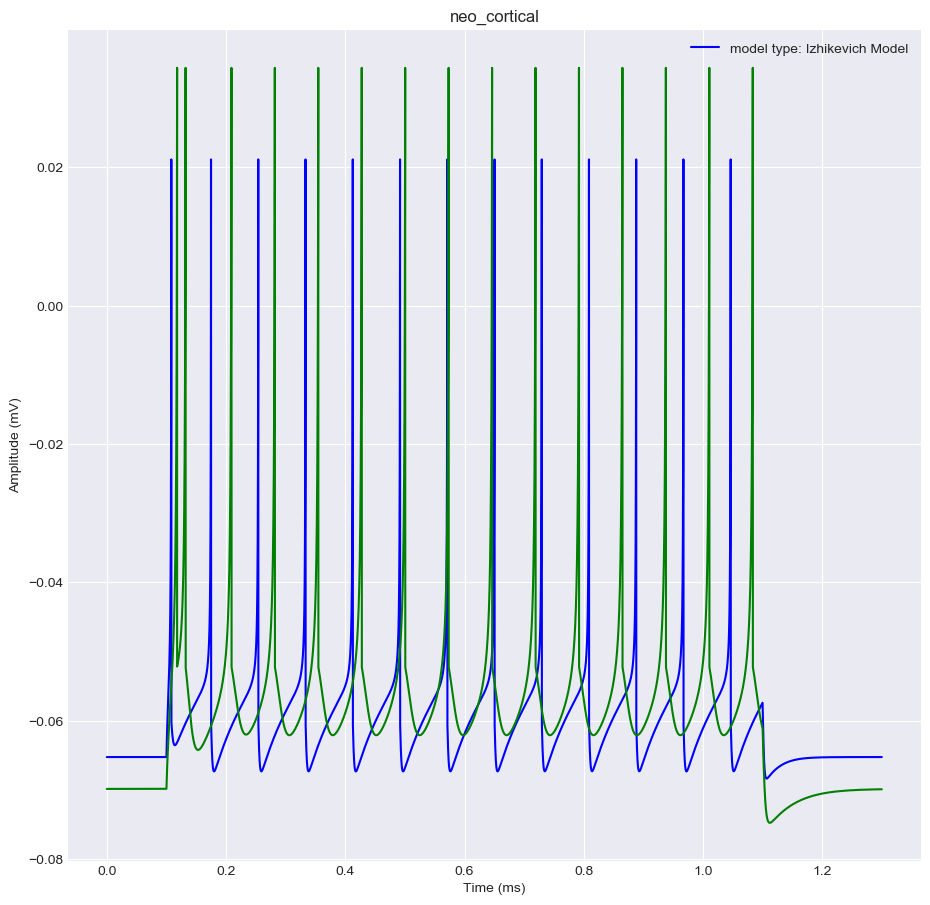

13
15


In [83]:
vm = inject_and_plot([results['pf'][0].dtc],second_pop=[results['pf'][0].dtc],third_pop=[target],snippets=False)#,second_pop=[results['dtc_pop']],third_pop=converged,snippets=False)
print(results['pf'][0].dtc.spike_number)
print(target.spike_number)


# Different model simulated data/Optimized model
In the cell below you can see that when a model is optimized to match data that was simulated using a different  model, the spike train statistics are an okay good fit. It's likely that with more intensive application of optimization algorithm, that the observation prediction agreement would be much better.

In [85]:
#dtcpop[0].ampl
dir(dtcpop[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'add_constant',
 'attrs',
 'backend',
 'boolean',
 'cached_attrs',
 'check_params',
 'constants',
 'delta',
 'dtc_to_gene',
 'dtc_to_model',
 'evaluated',
 'fitness',
 'from_imputation',
 'get_ss',
 'iap',
 'initiated',
 'judge_test',
 'lookup',
 'name',
 'observations',
 'plot_obs',
 'predictions',
 'preds',
 'previous',
 'protocols',
 'results',
 'rheobase',
 'run_number',
 'score',
 'scores',
 'scores_ratio',
 'searched',
 'searchedd',
 'steps',
 'summed',
 'td',
 'tests']

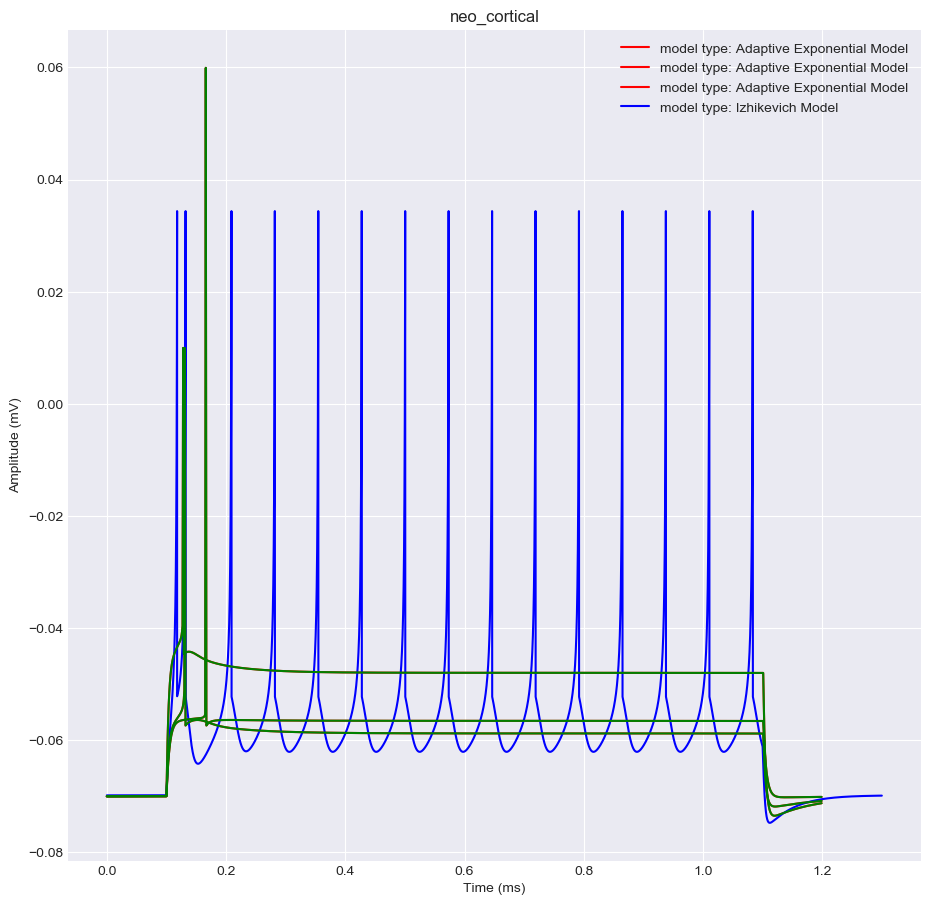

In [91]:
vm = inject_and_plot(similar,second_pop=[target],third_pop=similar,snippets=False)#,second_pop=[results['dtc_pop']],third_pop=converged,snippets=False)


## In the figures below:
Green denotes an adaptive exponential cell type. The plotting routines legend subplot needs some modification to appropriately label brian2 adexponential models.

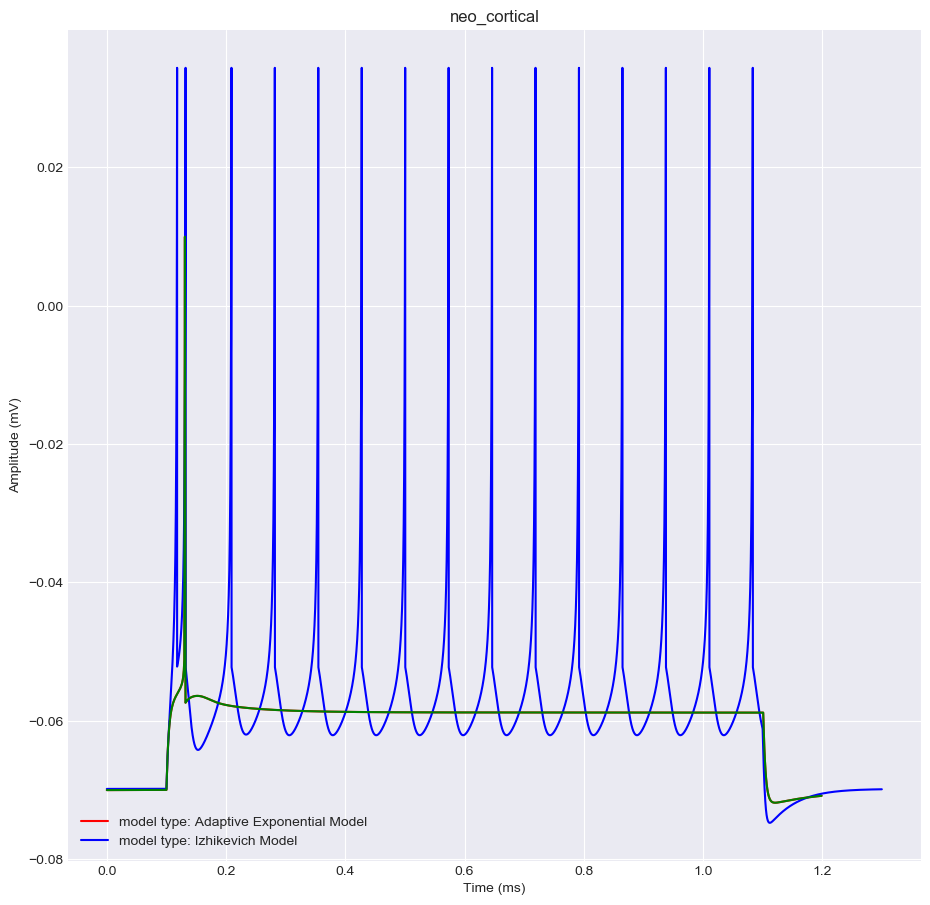

In [87]:
vm = inject_and_plot([dtcpop[1]],second_pop=[target],third_pop=[dtcpop[1]],snippets=False)#,second_pop=[results['dtc_pop']],third_pop=converged,snippets=False)


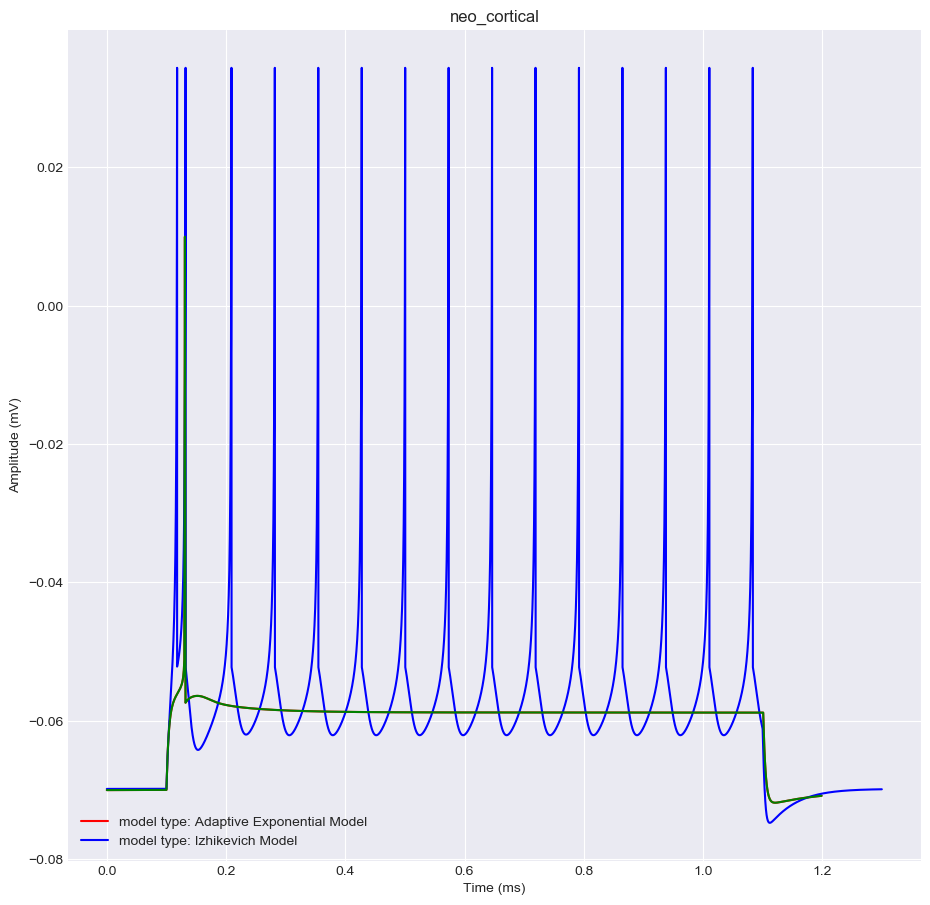

In [88]:
vm = inject_and_plot([dtcpop[1]],second_pop=[target],third_pop=[dtcpop[1]],snippets=False)#,second_pop=[results['dtc_pop']],third_pop=converged,snippets=False)


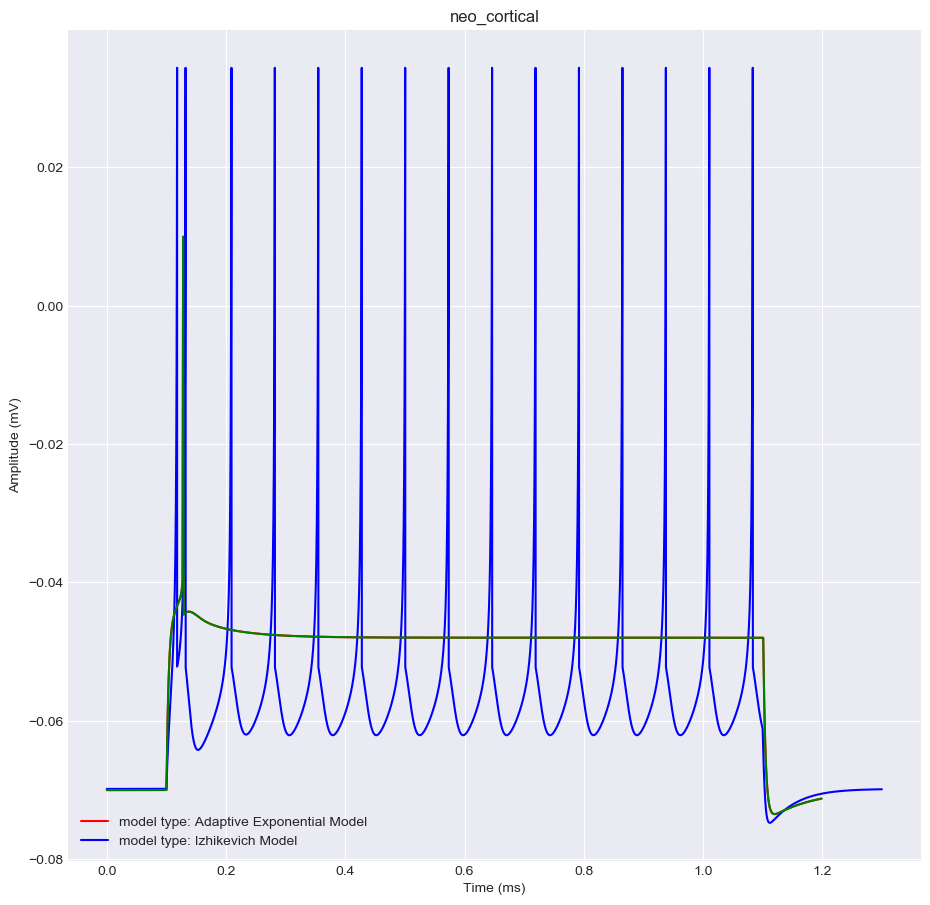

In [89]:
vm = inject_and_plot([dtcpop[-3]],second_pop=[target],third_pop=[dtcpop[-3]],snippets=False)#,second_pop=[results['dtc_pop']],third_pop=converged,snippets=False)


In [64]:
dfpt = pd.DataFrame([target.preds])
dfpt.T

,0
adapt,"{'mean': 0.07769622673684744, 'std': 10.0}"
adp_index,"{'mean': 0.07769622673684744, 'std': 10.0}"
adp_t,"{'mean': 0.07769622673684744, 'std': 10.0}"
adp_v,"{'mean': 0.07769622673684744, 'std': 10.0}"
avg_rate,"{'mean': 0.07769622673684744, 'std': 10.0}"
clipped,"{'mean': 0.07769622673684744, 'std': 10.0}"
current,{'mean': 0.2864583333333333 pA}
downstroke,"{'mean': 0.07769622673684744, 'std': 10.0}"
downstroke_index,"{'mean': 0.07769622673684744, 'std': 10.0}"
downstroke_t,"{'mean': 0.07769622673684744, 'std': 10.0}"


In [65]:
dfp1 = pd.DataFrame([results['pf'][0].dtc.preds])
dfp1.T
#dir(results['pf'][0].dtc.tests['adapt'])
#print(results['pf'][0].dtc.tests['adapt'].score_type)

,0
adapt,"{'mean': 0.19823085576034102, 'std': 0.0132153..."
adp_index,"{'mean': 0.19823085576034102, 'std': 0.0132153..."
adp_t,"{'mean': 0.19823085576034102, 'std': 0.0132153..."
adp_v,"{'mean': 0.19823085576034102, 'std': 0.0132153..."
avg_rate,"{'mean': 0.19823085576034102, 'std': 0.0132153..."
clipped,"{'mean': 0.19823085576034102, 'std': 0.0132153..."
current,"{'mean': 0.19823085576034102, 'std': 0.0132153..."
downstroke,"{'mean': 0.19823085576034102, 'std': 0.0132153..."
downstroke_index,"{'mean': 0.19823085576034102, 'std': 0.0132153..."
downstroke_t,"{'mean': 0.19823085576034102, 'std': 0.0132153..."



This concludes chapter 3, next see chapter 4.
# Change sciunit score type


In [19]:
from sciunit import scores
scores.RatioScore
for k,v in results['pf'][0].dtc.tests.items():
    v.score_type = scores.RatioScore
    res_score = results['pf'][0].dtc.judge_test(v)
res_score    
    

{'adapt': {'mean': 0.19823085576034102, 'std': 0.013215390384022734},
 'latency': {'mean': 0.19823085576034102, 'std': 0.013215390384022734},
 'isi_cv': {'mean': 0.19823085576034102, 'std': 0.013215390384022734},
 'mean_isi': {'mean': 0.19823085576034102, 'std': 0.013215390384022734},
 'median_isi': {'mean': 0.19823085576034102, 'std': 0.013215390384022734},
 'first_isi': {'mean': 0.19823085576034102, 'std': 0.013215390384022734},
 'avg_rate': {'mean': 0.19823085576034102, 'std': 0.013215390384022734},
 'threshold_index': {'mean': 0.19823085576034102, 'std': 0.013215390384022734},
 'clipped': {'mean': 0.19823085576034102, 'std': 0.013215390384022734},
 'threshold_t': {'mean': 0.19823085576034102, 'std': 0.013215390384022734},
 'threshold_v': {'mean': 0.19823085576034102, 'std': 0.013215390384022734},
 'peak_index': {'mean': 0.19823085576034102, 'std': 0.013215390384022734},
 'peak_t': {'mean': 0.19823085576034102, 'std': 0.013215390384022734},
 'peak_v': {'mean': 0.19823085576034102, '

In [23]:
import pandas as pd
df = pd.DataFrame([target.scores])
df1 = pd.DataFrame([results['pf'][0].dtc.scores])
df = df.append(df1)
          
df.T

,0,0
0,None,NaN
adapt,NaN,1
adp_index,NaN,1
adp_t,NaN,1
adp_v,NaN,1
avg_rate,NaN,1
clipped,NaN,1
current,NaN,1
downstroke,NaN,1
downstroke_index,NaN,1


In [21]:
results['pf'][0].dtc
target

# To do:
use allensdk real cell data, to do data driven optimization of cells

In [32]:
from neuronunit.optimisation import get_three_features_from_allen_data

ModuleNotFoundError: No module named 'get_three_feature_sets_from_nml_db'